In [124]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from statsmodels.stats.multitest import multipletests

In [176]:
%matplotlib inline

# Li modules

In [5]:
liM = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/aat7615_Li_Tables_S1_to_S16.xlsx'
                      ).parse('Table S10')
liM.head()

,Table S10. Weighted co-expressed gene modules and spatio-temproal characterization,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 9406,Unnamed: 9407,Unnamed: 9408,Unnamed: 9409,Unnamed: 9410,Unnamed: 9411,Unnamed: 9412,Unnamed: 9413,Unnamed: 9414,Unnamed: 9415
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Module,Size,Spatiotemproal patterns,NaN,w4-w5 Transit,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Interpretation,P-values,Interpretation,Pval_age,Pval_region,Enrichment,Pval_preRegion,Pval_postRegion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ME1,9401,NaN,NaN,no,1.35143e-08,5.40352e-05,Postnatal_enrich,0.00173393,0.00310527,...,ENSG00000280438|RP11-315A16.2,ENSG00000280452|ABBA01014710.1,ENSGR0000223274|RNA5SP498,ENSGR0000229232|KRT18P53,ENSGR0000263835|BX649553.1,ENSGR0000263980|BX649553.2,ENSGR0000264510|BX649553.3,ENSGR0000264819|BX649553.4,ENSGR0000265658|MIR3690,ENSGR0000276543|AJ271736.1


In [6]:
li_modules = {}
for i,row in liM.iterrows():
    if i <4: continue
    mod = row[liM.columns[0]]
    glist = row[liM.columns[15:]].dropna().values
    glist = np.unique([x.split('|')[1] for x in glist])
    li_modules.update({mod:glist})

In [9]:
wdir = '/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/'

In [10]:
pandas.to_pickle(li_modules,
                 os.path.join(wdir,'li_modules.pk'))

In [134]:
li_modules.keys()

dict_keys(['ME1', 'ME2', 'ME3', 'ME4', 'ME5', 'ME6', 'ME7', 'ME8', 'ME9', 'ME10', 'ME11', 'ME12', 'ME13', 'ME14', 'ME15', 'ME16', 'ME17', 'ME18', 'ME19', 'ME20', 'ME21', 'ME22', 'ME23', 'ME24', 'ME25', 'ME26', 'ME27', 'ME28', 'ME29', 'ME30', 'ME31', 'ME32', 'ME33', 'ME34', 'ME35', 'ME36', 'ME37', 'ME38', 'ME39', 'ME40', 'ME41', 'ME42', 'ME43', 'ME44', 'ME45', 'ME46', 'ME47', 'ME48', 'ME49', 'ME50', 'ME51', 'ME52', 'ME53', 'ME54', 'ME55', 'ME56', 'ME57', 'ME58', 'ME59', 'ME60', 'ME61', 'ME62', 'ME63', 'ME64', 'ME65', 'ME66', 'ME67', 'ME68', 'ME69', 'ME70', 'ME71', 'ME72', 'ME73'])

In [11]:
del(liM)

# Li GWAS

In [12]:
LiG = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/aat7615_Li_Tables_S1_to_S16.xlsx'
                      ).parse('Table S13')
LiG.head()

,Table S13: Genes associated to disease via GWAS (LIST 1),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ADHD,NaN,NaN,ASD,NaN,NaN,AD,NaN,NaN,...,NaN,NaN,BD,NaN,NaN,HEIGHT,NaN,NaN,HbA1c,NaN
2,NaN,Gene,Association type,NaN,Gene,Association type,NaN,Gene,Association type,NaN,...,Association type,NaN,Gene,Association type,NaN,Gene,Association type,NaN,Gene,Association type
3,NaN,AC004158.2,"Genic,HiC_Giusti,NoInt_Won",NaN,C8orf74,HiC_Giusti,NaN,ABCA7,Genic,NaN,...,HiC_Giusti,NaN,AC002306.1,"Promoter,HiC_Giusti",NaN,AACS,HiC_Giusti,NaN,AARD,HiC_Giusti
4,NaN,AC004158.3,"Genic,NoInt_Giusti,HiC_Giusti,NoInt_Won,HiC_Won",NaN,CFAP61,HiC_Giusti,NaN,AC005757.6,"Genic,Promoter,HiC_Giusti",NaN,...,HiC_Giusti,NaN,AC002985.3,HiC_Giusti,NaN,AAED1,"HiC_Giusti,HiC_Won",NaN,ABCB11,Genic


In [13]:
gwas = {}
for col in LiG.columns:
    trait = LiG.loc[LiG.index[1],col]
    if pandas.notnull(trait) and trait != 'HEIGHT':
        glist = np.unique(LiG.loc[LiG.index[3:],col].dropna().values)
        gwas.update({trait: glist})

In [14]:
gwas.keys()

dict_keys(['ADHD', 'ASD', 'AD', 'SCZ', 'IQ', 'NEUROT', 'MDD', 'PD', 'BD', 'HbA1c'])

In [16]:
pandas.to_pickle(gwas,
                 os.path.join(wdir,'li_gwas.pk'))

In [17]:
del(LiG)

# Li Cells

In [18]:
LiC = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/aat7615_Li_Tables_S1_to_S16.xlsx'
                      ).parse('Table S8')
LiC.head()

,Table S8. List of genes for cell type signature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gene symbol,Cell type,Age,NaN,NaN,NaN,Gene symbol,Cell type,Age
3,RPL18A,NPC_prenatal,Prenatal,NaN,NaN,NaN,ADGRV1,Astro_adult,Adult
4,RPL7,NPC_prenatal,Prenatal,NaN,NaN,NaN,SLC1A2,Astro_adult,Adult


In [19]:
lcells = {}

pcells = LiC.iloc[3:,1].unique()
for cell in pcells:
    glist = LiC[LiC[LiC.columns[1]] == cell].iloc[:,0].dropna().values
    lcells.update({cell: glist})

acells = LiC.iloc[3:,7].unique()
for cell in acells:
    glist = LiC[LiC[LiC.columns[7]] == cell].iloc[:,6].dropna().values
    lcells.update({cell: glist})

In [20]:
lcells.keys()

dict_keys(['NPC_prenatal', 'Oligo_prenatal', 'Astro_prenatal', 'ExN_prenatal', 'IntN_prenatal', 'Microglia_prenatal', 'Endo_prenatal', 'Astro_adult', 'Endo_adult', 'ExN_adult', 'IntN_adult', 'Microglia_adult', 'Oligo_adult', 'OPC_adult', 'VSMC_adult', nan])

In [22]:
pandas.to_pickle(lcells,
                 os.path.join(wdir,'li_cells.pk'))

In [23]:
del(LiC)

# Miller modules

In [24]:
miller = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/41586_2014_BFnature13185_MOESM56_ESM.xls'
                      ).parse('Sup Table 5')
miller.head()

,Gene,Probe,Module,Unnamed: 3,Unnamed: 4,grey60 (C1),Unnamed: 6,darkgreen (C2),Unnamed: 8,steelblue (C3),...,yellow (C38),Unnamed: 80,darkmagenta (C39),Unnamed: 82,white (C40),Unnamed: 84,darkorange (C41),Unnamed: 86,yellowgreen (C42),Unnamed: 88
0,NaN,NaN,Color,Lab.,kME,kME,pVal,kME,pVal,kME,...,kME,pVal,kME,pVal,kME,pVal,kME,pVal,kME,pVal
1,MRPS34,A_23_P163496,grey60,C1,0.921624,0.921624,1.49e-217,0.641246,2.93e-62,0.480343,...,-0.173481,6.34e-05,-0.136168,0.00174721,-0.122566,0.00487865,-0.170527,8.48e-05,-0.214741,6.65e-07
2,CHRM1,CUST_2043_PI417557136,grey60,C1,0.915999,0.915999,5.37e-210,0.702165,2.5e-79,0.407129,...,-0.273665,1.73e-10,-0.277734,9.02e-11,-0.176211,4.83e-05,-0.204135,2.35e-06,-0.190141,1.13e-05
3,CCL24,A_23_P215491,grey60,C1,0.906746,0.906746,1.18e-198,0.632904,3.22e-60,0.389288,...,-0.146381,0.000758876,-0.161474,0.00020003,-0.148714,0.000622424,-0.178827,3.71e-05,-0.198084,4.7e-06
4,B3GNT7,A_24_P913716,grey60,C1,0.905273,0.905273,5.89e-197,0.617017,1.69e-56,0.342201,...,-0.303653,1.11e-12,-0.25797,1.92e-09,-0.111976,0.0101666,-0.172381,7.07e-05,-0.120149,0.00579728


In [25]:
Miller_modules = {}

mods = miller.iloc[1:,3].unique()
for mod in mods:
    if mod == 'grey':continue
    glist = miller[miller[miller.columns[3]] == mod].iloc[:,0].dropna().values
    Miller_modules.update({mod: glist})

In [26]:
Miller_modules.keys()

dict_keys(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C5', 'C6', 'C7', 'C8', 'C9'])

In [28]:
pandas.to_pickle(Miller_modules,
                 os.path.join(wdir,'Miller_modules.pk'))

In [29]:
del(miller)

# DisGenNet

In [30]:
dgn = pandas.read_csv('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/all_gene_disease_associations.tsv',
                     sep='\t')
dgn.head()


,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.857,0.172,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,0.01,NaN,2008.0,2008.0,1,0,LHGDN
1,1,A1BG,0.857,0.172,C0002736,Amyotrophic Lateral Sclerosis,disease,C10;C18,Disease or Syndrome,0.01,1.0,2009.0,2009.0,1,0,BEFREE
2,1,A1BG,0.857,0.172,C0013080,Down Syndrome,disease,C10;C16,Disease or Syndrome,0.01,1.0,2011.0,2011.0,1,0,BEFREE
3,1,A1BG,0.857,0.172,C0017636,Glioblastoma,disease,C04,Neoplastic Process,0.01,1.0,2014.0,2014.0,1,0,BEFREE
4,1,A1BG,0.857,0.172,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,0.30,NaN,2017.0,2017.0,1,0,CTD_human


In [157]:
#### by disease

In [149]:
def remove_nums(word):
    
    ws = d.rstrip().replace(',','').split(' ')
    if ws[-1].isnumeric():
        n = len(ws)
        newstr = ''
        for word in range(n):
            if word != n-2:
                newstr += ws[word]+' '
            elif word == n-1:
                newstr += word
    else:
        newstr = word
        
    return newstr

diz = dgn.diseaseName.unique()
newdiz = []
for d in diz:
    if ',' in d:
        d = d.split(',')[0]
    d = d.rstrip()
    d = remove_nums(d)
    if d.rstrip().isnumeric(): continue
    d = d.rstrip()
    d = remove_nums(d)
    if d.rstrip().isnumeric(): continue
    newdiz.append(d)
    d = remove_nums(d)
    if d.rstrip().isnumeric(): continue


In [158]:
diseases = {}

for diz in newdiz:
    glist = dgn[dgn.diseaseName == mod]['geneSymbol'].dropna().values
    diseases.update({diz: glist})

#### by class

In [31]:
d_classes = {}
for cl in dgn.diseaseClass.unique():
    glist = dgn[dgn.diseaseClass == cl]['geneSymbol'].dropna().values
    d_classes.update({cl: glist})


In [32]:
d_classes.keys()

dict_keys(['C04', 'C10;C18', 'C10;C16', 'C06;C23', 'F03', 'C10;F03', 'C18', 'C15', 'C05;C17;C20', 'C08;C20', 'C04;C17', 'C04;C06', 'C06;C08;C16', 'F01', nan, 'C18;C19', 'C12;C13;C20', 'C06;C10;C16;C18', 'C14;C16;C17;C20', 'C11', 'C16;C17', 'C12;C13', 'C06', 'C08', 'C04;C08', 'C10;C20', 'C14', 'C08;C09;C23', 'C04;C23', 'C18;C23', 'C05', 'C04;C12', 'C10;C14', 'C03', 'C12;C13;C23', 'C10;C14;C18', 'C05;C16;C19', 'C06;C08;C16;C23', 'C16;C17;C18', 'C23', 'C10', 'C01;C23', 'C12', 'C16', 'C25;F03', 'C04;C12;C13', 'C01', 'C25', 'C02;C06', 'C04;C08;C09', 'C04;C15;C20', 'C17;C20', 'C04;C14;C15;C20', 'C17;C24', 'C04;C06;C16', 'C17', 'C04;C07', 'C04;C06;C19', 'C08;C20;C24', 'C02;C20', 'C07;C11;C14;C16;C17', 'C04;C10', 'C07;C16', 'C10;C14;F03', 'C16;C17;C20', 'C18;C19;C20', 'C12;C13;C19', 'C20;C25', 'C13', 'C16;C18', 'C07', 'C06;C25', 'C10;C16;F03', 'C04;C07;C23', 'C05;C10', 'C05;C18', 'C04;C19', 'C01;C08', 'C02', 'C05;C10;C18', 'C04;C13;C19', 'C04;C06;C16;C18', 'C09;C10;C23', 'C04;C07;C09', 'C17;C2

In [34]:
pandas.to_pickle(d_classes,
                 os.path.join(wdir,'DGN_DisClassCombos.pk'))

In [35]:
del(dgn)

# AD mods

In [36]:
ADm = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/41586_2019_1195_MOESM6_ESM.xlsx'
                      ).parse('Gene-trait correlation modules')
ADm.head()

,Module 1,Unnamed: 1,Unnamed: 2,Module 2,Unnamed: 4,Unnamed: 5,Module 3,Unnamed: 7,Unnamed: 8,Module 4,...,Unnamed: 19,Unnamed: 20,Module 8,Unnamed: 22,Unnamed: 23,Module 9,Unnamed: 25,Unnamed: 26,Module 10,Unnamed: 28
0,Gene,SOM_unit,NaN,Gene,SOM_unit,NaN,Gene,SOM_unit,NaN,Gene,...,SOM_unit,NaN,Gene,SOM_unit,NaN,Gene,SOM_unit,NaN,Gene,SOM_unit
1,CAPZA1,146,NaN,C1orf87,481,NaN,PREPL,22,NaN,PITHD1,...,485,NaN,CAP1,618,NaN,GLUL,640,NaN,LRRTM1,636
2,ANXA4,146,NaN,SNED1,481,NaN,RNF149,22,NaN,PDHB,...,485,NaN,DEGS1,618,NaN,REST,640,NaN,LYG2,636
3,SLC20A1,146,NaN,COL8A1,481,NaN,NFE2L2,22,NaN,VDAC1,...,485,NaN,GPX1,618,NaN,PCDH10,640,NaN,CAMK1,636
4,NR1D2,146,NaN,CP,481,NaN,CARF,22,NaN,YIPF3,...,485,NaN,SNCA,618,NaN,MYO10,640,NaN,FRG1,636


In [37]:
AD_modules = {}
for col in ADm:
    if 'Module' in col:
        glist = ADm.loc[ADm.index[1:],col].dropna().values
        AD_modules.update({col: glist})

In [38]:
AD_modules.keys()

dict_keys(['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8', 'Module 9', 'Module 10'])

In [39]:
pandas.to_pickle(AD_modules,
                 os.path.join(wdir,'AD_modules.pk'))

In [40]:
del(ADm)

# AD cells

In [41]:
ADc = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/41586_2019_1195_MOESM8_ESM.xlsx'
                      ).parse('Subpopulation_markers')
ADc.head()

,"Sub-population over-expressed genes, relative to other subpopulations of the same type (Cut-off criteria: 2-sided Wilcoxon-rank-sum test, FDR corrected p-value <=0.01, logFC of 0.5, detected in at least 25% of the cells within the subcluster.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,gene.name,adj.pvals,lFC,subpopulation,NaN,NaN,NaN,NaN,subpopulation,size (n)
1,DAB1,0,1.13827,Ex0,NaN,NaN,NaN,NaN,Ast0,1728
2,ST6GALNAC5,0,0.68265,Ex0,NaN,NaN,NaN,NaN,Ast1,1134
3,DPYD,0,0.604381,Ex0,NaN,NaN,NaN,NaN,Ast2,369
4,RPS6KC1,0,0.639587,Ex0,NaN,NaN,NaN,NaN,Ast3,161


In [42]:
AD_cells = {}

cells = ADc.iloc[1:,3].unique()
for cell in cells:
    glist = ADc[ADc[ADc.columns[3]] == cell].iloc[:,3].dropna().values
    AD_cells.update({cell: glist})

In [43]:
AD_cells.keys()

dict_keys(['Ex0', 'Ex1', 'Ex11', 'Ex12', 'Ex14', 'Ex2', 'Ex3', 'Ex4', 'Ex5', 'Ex6', 'Ex7', 'Ex8', 'Ex9', 'In0', 'In1', 'In10', 'In11', 'In2', 'In3', 'In4', 'In5', 'In6', 'In7', 'In8', 'In9', 'Ast0', 'Ast1', 'Ast2', 'Ast3', 'Oli0', 'Oli1', 'Oli3', 'Oli4', 'Oli5', 'Opc0', 'Opc1', 'Opc2', 'Mic0', 'Mic1', 'Mic2', 'Mic3'])

In [44]:
pandas.to_pickle(AD_cells,
                 os.path.join(wdir,'AD_cells.pk'))

In [45]:
del(ADc)

# Lake cells

In [46]:
lake = pandas.ExcelFile('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/Lake2018_S1.xlsx'
                      ).parse('Table S3')
lake.head()

,Unnamed: 0,Table S3. Differentially expressed genes between all snDrop-seq clusters,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,All Clusters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cerebellar Hemisphere OPCs,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Gene,p Value,False Discovery Rate,Average Difference (log fold change),Fraction of Detection in Cluster,Fraction of Detection in Other Clusters,Cluster,NaN,NaN,...,Cluster,NaN,NaN,Gene,p Value,False Discovery Rate,Average Difference (log fold change),Fraction of Detection in Cluster,Fraction of Detection in Other Clusters,Cluster
3,NaN,CBLN2,0,0,1.73427,0.705,0.107,Ex1,NaN,NaN,...,Ast,NaN,NaN,LRRC4C,9.65076e-30,4.94601e-28,1.91341,0.885,0.312,OPC
4,NaN,ENC1,0,0,1.5074,0.697,0.153,Ex1,NaN,NaN,...,Ast,NaN,NaN,LHFPL3,5.18088e-28,2.12416e-26,2.16632,0.885,0.312,OPC


In [49]:
lake_cells = {}

cells = lake.iloc[3:,7].unique()
for cell in cells:
    glist = lake[lake[lake.columns[7]] == cell].iloc[:,1].dropna().values
    lake_cells.update({cell: glist})

In [50]:
lake_cells.keys()

dict_keys(['Ex1', 'Ex2', 'Ex3a', 'Ex3b', 'Ex3c', 'Ex3d', 'Ex3e', 'Ex4', 'Ex5a', 'Ex5b', 'Ex6a', 'Ex6b', 'Ex8', 'Gran', 'In1a', 'In1b', 'In1c', 'In2', 'In3', 'In4a', 'In4b', 'In6a', 'In6b', 'In7', 'In8', 'Purk1', 'Purk2', 'End', 'Per', 'Ast', 'Ast_Cer', 'Oli', 'OPC', 'OPC_Cer', 'Mic'])

In [51]:
pandas.to_pickle(lake_cells,
                 os.path.join(wdir,'lake_cells.pk'))

In [52]:
del(lake)

# Enrichment

In [56]:
c1.columns[0]

'0'

In [116]:
c1 = pandas.read_csv('/Users/jakevogel/Science/AHBA/C1_betas.csv',
                     index_col=0)
c1.sort_values(c1.columns[0],ascending=False,inplace=True)

c2 = pandas.read_csv('/Users/jakevogel/Science/AHBA/C2_betas.csv',
                     index_col=0)
c2.sort_values(c2.columns[0],ascending=False,inplace=True)

c3 = pandas.read_csv('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/C3_genelist.csv',
                     index_col=0)
c3.sort_values(c3.columns[0],ascending=False,inplace=True)

In [152]:
len(bot_c1)

1722

In [151]:
thresh = 0.05
cut = int(len(c1) * thresh)
top_c1 = np.unique(c1.gene_symbol.values[:cut])
top_c2 = np.unique(c2.gene_symbol.values[:cut])
top_c3 = np.unique(c3.gene_symbol.values[:cut])

cut2 = len(c1) - cut
bot_c1 = np.unique(c1.gene_symbol.values[cut2:])
bot_c2 = np.unique(c2.gene_symbol.values[cut2:])
bot_c3 = np.unique(c3.gene_symbol.values[cut2:])

In [251]:
# practice round
n_iter = 1000

full_list = c1.gene_symbol.unique()
shuffler = deepcopy(full_list)

N = len(full_list)
p_res = pandas.DataFrame(index=Miller_modules.keys())
for mod in Miller_modules.keys():
    print('working on',mod)
    B = len(Miller_modules[mod])
    n = cut
    p_res.loc[mod,'N'] = N
    p_res.loc[mod,'B'] = B
    p_res.loc[mod,'n'] = n
    rand_Es = []
    for i in range(n_iter):
        np.random.shuffle(shuffler)
        glist = shuffler[:cut]
        rand_b = len(set(glist) & set(Miller_modules[mod]))
        rand_enr = (rand_b/n) / (B/N)
        rand_Es.append(rand_enr)
    rand_Es = np.array(rand_Es)
    for i,comp in enumerate([top_c1,top_c2,top_c3]):
        match = set(comp) & set(Miller_modules[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        if p <0.001:
            p = 0.0001
        p_res.loc[mod,'Top_C%s_b'%i] = b
        p_res.loc[mod,'Top_C%s_Enrichment'%i] = enr
        p_res.loc[mod,'Top_C%s_p'%i] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res.loc[mod,'C%s_genes'%i] = genes
    for i,comp in enumerate([bot_c1,bot_c2,bot_c3]):
        match = set(comp) & set(Miller_modules[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        if p <0.001:
            p = 0.0001
        p_res.loc[mod,'Btm_C%s_b'%i] = b
        p_res.loc[mod,'Btm_C%s_Enrichment'%i] = enr
        p_res.loc[mod,'Btm_C%s_p'%i] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res.loc[mod,'C%s_genes'%i] = genes

working on C1
working on C10
working on C11
working on C12
working on C13
working on C14
working on C15
working on C16
working on C17
working on C18
working on C19
working on C2
working on C20
working on C21
working on C22
working on C23
working on C24
working on C25
working on C26
working on C27
working on C28
working on C29
working on C3
working on C30
working on C31
working on C32
working on C33
working on C34
working on C35
working on C36
working on C37
working on C38
working on C39
working on C4
working on C40
working on C41
working on C42
working on C5
working on C6
working on C7
working on C8
working on C9


In [252]:
for comp in range(3):
    ps = p_res['Top_C%s_p'%comp].values
    p_res.loc[:,'Top_C%s_FDRq'%comp] = multipletests(ps,method='fdr_bh')[1]
    
    ps = p_res['Btm_C%s_p'%comp].values
    p_res.loc[:,'Btm_C%s_FDRq'%comp] = multipletests(ps,method='fdr_bh')[1]
    

In [253]:
p_res.sort_values('Btm_C0_FDRq')

,N,B,n,Top_C0_b,Top_C0_Enrichment,Top_C0_p,C0_genes,Top_C1_b,Top_C1_Enrichment,Top_C1_p,...,Btm_C1_p,Btm_C2_b,Btm_C2_Enrichment,Btm_C2_p,Top_C0_FDRq,Btm_C0_FDRq,Top_C1_FDRq,Btm_C1_FDRq,Top_C2_FDRq,Btm_C2_FDRq
C16,29131.0,226.0,2934.0,29.0,1.274045,0.0480,GRM3 NGB GPR37 DLC1 SORCS1 PPP1R1B RIMS2 PDE8B...,19.0,0.834719,0.748,...,0.910,53.0,2.328427,0.0001,0.336000,0.00105,0.943950,1.0,0.0980,0.001400
C22,29131.0,662.0,2934.0,37.0,0.554931,1.0000,CECR6 CRIP2 FLJ30901 CAMKV SYT13 ACTN2 ISLR2 K...,62.0,0.929884,0.616,...,1.000,88.0,1.319836,0.0010,1.000000,0.00105,0.943950,1.0,1.0000,0.010500
C21,29131.0,100.0,2934.0,6.0,0.595726,0.9300,ARHGDIG PNCK PDE2A BATF3 HBQ1 KIF17 OSBPL1A RA...,9.0,0.893589,0.650,...,0.879,23.0,2.283616,0.0001,1.000000,0.00105,0.943950,1.0,1.0000,0.001400
C31,29131.0,122.0,2934.0,15.0,1.220750,0.1810,VAX1 LHX6 DLX5 STEAP2 SLC32A1 GAD2 GAS2L3 DLX6...,13.0,1.057983,0.362,...,0.825,15.0,1.220750,0.1810,0.760200,0.00105,0.943950,1.0,0.3960,0.760200
C6,29131.0,116.0,2934.0,7.0,0.599150,0.8870,CUX2 GAST VIP ZBTB16 ONECUT2 HSD11B1 CNR1 CCK ...,13.0,1.112707,0.252,...,0.997,14.0,1.198299,0.1630,1.000000,0.04200,0.917538,1.0,0.2835,0.760200
C26,29131.0,802.0,2934.0,37.0,0.458060,1.0000,RBM24 HOOK1 NECAB1 ERC2 MYT1L DPP10 MCHR2 FLRT...,91.0,1.126581,0.036,...,1.000,62.0,0.767560,0.9630,1.000000,0.31500,0.756000,1.0,1.0000,1.000000
C24,29131.0,58.0,2934.0,1.0,0.171186,0.9970,C9orf45 SGSM2 NELF KIF3B KIF21B MGAT5B KIAA064...,5.0,0.855928,0.648,...,0.805,11.0,1.883042,0.0110,1.000000,0.99000,0.943950,1.0,1.0000,0.077000
C1,29131.0,172.0,2934.0,18.0,1.039057,0.3120,GRIK3 CHRM1 BAD PDCD6 AMOT RPRML SLC17A7 HTR7 ...,12.0,0.692705,0.884,...,0.933,17.0,0.981332,0.4190,1.000000,1.00000,0.943950,1.0,1.0000,1.000000
C32,29131.0,429.0,2934.0,18.0,0.416592,1.0000,PSMC3 LHX2 PCDHB2 GMPPB NNAT APEH PMEPA1 HAUS7...,36.0,0.833183,0.802,...,0.994,11.0,0.254584,1.0000,1.000000,1.00000,0.943950,1.0,1.0000,1.000000
C33,29131.0,81.0,2934.0,7.0,0.858042,0.6160,CD38 MMD2 SNTA1 RBPMS2 C1QL2 C1QL1 INF2 CLDN10,7.0,0.858042,0.616,...,0.756,2.0,0.245155,0.9990,1.000000,1.00000,0.943950,1.0,0.3960,1.000000


In [254]:
p_res.to_csv('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/miller_module_enr.csv')
    

### Celltypes

In [165]:
n_iter = 1000

full_list = c1.gene_symbol.unique()
shuffler = deepcopy(full_list)

ref_set = lake_cells

N = len(full_list)
p_res = pandas.DataFrame(index=ref_set.keys())
for mod in ref_set.keys():
    print('working on',mod)
    B = len(ref_set[mod])
    n = cut
    p_res.loc[mod,'N'] = N
    p_res.loc[mod,'B'] = B
    p_res.loc[mod,'n'] = n
    rand_Es = []
    for i in range(n_iter):
        np.random.shuffle(shuffler)
        glist = shuffler[:cut]
        rand_b = len(set(glist) & set(ref_set[mod]))
        rand_enr = (rand_b/n) / (B/N)
        rand_Es.append(rand_enr)
    rand_Es = np.array(rand_Es)
    for i,comp in enumerate([top_c1,top_c2,top_c3]):
        match = set(comp) & set(ref_set[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        if p <0.001:
            p = 0.0001
        p_res.loc[mod,'Top_C%s_b'%i] = b
        p_res.loc[mod,'Top_C%s_Enrichment'%i] = enr
        p_res.loc[mod,'Top_C%s_p'%i] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res.loc[mod,'C%s_genes'%i] = genes
    for i,comp in enumerate([bot_c1,bot_c2,bot_c3]):
        match = set(comp) & set(ref_set[mod])
        b = len(match)
        enr = (b/n) / (B/N)
        p = (n_iter - len(rand_Es[rand_Es<enr]))*(1/n_iter)
        if p <0.001:
            p = 0.0001
        p_res.loc[mod,'Btm_C%s_b'%i] = b
        p_res.loc[mod,'Btm_C%s_Enrichment'%i] = enr
        p_res.loc[mod,'Btm_C%s_p'%i] = p
        genes = ''
        for g in match:
            genes += g+' '
        p_res.loc[mod,'C%s_genes'%i] = genes

working on Ex1
working on Ex2
working on Ex3a
working on Ex3b
working on Ex3c
working on Ex3d
working on Ex3e
working on Ex4
working on Ex5a
working on Ex5b
working on Ex6a
working on Ex6b
working on Ex8
working on Gran
working on In1a
working on In1b
working on In1c
working on In2
working on In3
working on In4a
working on In4b
working on In6a
working on In6b
working on In7
working on In8
working on Purk1
working on Purk2
working on End
working on Per
working on Ast
working on Ast_Cer
working on Oli
working on OPC
working on OPC_Cer
working on Mic


In [166]:
for comp in range(3):
    ps = p_res['Top_C%s_p'%comp].values
    p_res.loc[:,'Top_C%s_FDRq'%comp] = multipletests(ps,method='fdr_bh')[1]
    
    ps = p_res['Btm_C%s_p'%comp].values
    p_res.loc[:,'Btm_C%s_FDRq'%comp] = multipletests(ps,method='fdr_bh')[1]
    

In [205]:
p_res[[x for x in p_res.columns if 'Enri' in x]].values.flatten().max()

4.964383094751192

In [213]:
p_res['Top_C0_Enrichment'].sort_values(ascending=False).head()

Gran       3.638021
End        1.946817
Ast_Cer    1.686017
Purk1      1.637375
Purk2      1.566051
Name: Top_C0_Enrichment, dtype: float64

In [214]:
p_res['Top_C1_Enrichment'].sort_values(ascending=False).head()

End     1.752135
In7     1.540671
Ex2     1.405442
Per     1.396233
Ex3a    1.371975
Name: Top_C1_Enrichment, dtype: float64

In [215]:
p_res['Top_C2_Enrichment'].sort_values(ascending=False).head()

In6b    2.492937
Ex3d    2.303733
In6a    2.040157
Per     2.016781
Ex6a    1.960186
Name: Top_C2_Enrichment, dtype: float64

In [217]:
p_res['Btm_C0_Enrichment'].sort_values(ascending=False).head()

Ex5b    4.964383
Ex2     4.715031
Ex6b    4.144577
Ex1     4.134273
Ex3a    4.043716
Name: Btm_C0_Enrichment, dtype: float64

In [218]:
p_res['Btm_C2_Enrichment'].sort_values(ascending=False).head()

Ex1     2.311287
Ex5b    2.192603
Ex8     2.025601
Gran    1.894803
Ex2     1.858810
Name: Btm_C2_Enrichment, dtype: float64

In [171]:
p_res.to_csv('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/lake_cell_enr.csv')


In [235]:
def replacer(col):
    if 'C0' in col:
        col = col.replace('C0','C1')
    elif 'C1' in col:
        col = col.replace('C1','C2')
    elif 'C2' in col:
        col = col.replace('C2','C3')
    return col

In [239]:
lake_res = pandas.read_csv('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/lake_cell_enr.csv',
                          index_col=0)
lake_res.columns = [replacer(x) for x in lake_res.columns]
lr2 = pandas.DataFrame(lake_res[lake_res.columns[-6:]],copy=True)
for col in lr2:
    lr2.loc[:,col] = -np.log10(lr2.loc[:,col])

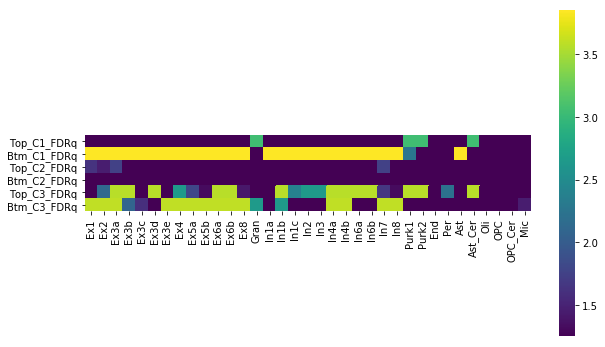

In [241]:
plt.subplots(figsize=(10,6))
sns.heatmap(lr2.T,cmap='viridis',vmin=1.25,square=True,)


In [258]:
milmod = pandas.read_csv('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/ADDX/ADDX/enrichment/miller_module_enr.csv',
                          index_col=0)
milmod.columns = [replacer(x) for x in milmod.columns]
milmod = milmod.loc[['C%s'%x for x in range(1,43)]]
mm2 = pandas.DataFrame(milmod[milmod.columns[-6:]],copy=True)
for col in mm2:
    mm2.loc[:,col] = -np.log10(mm2.loc[:,col])

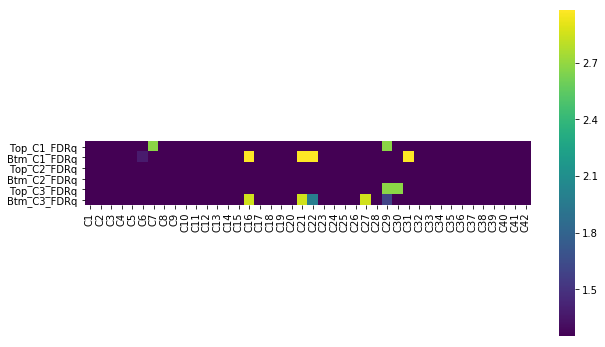

In [259]:
plt.subplots(figsize=(10,6))
sns.heatmap(mm2.T,cmap='viridis',vmin=1.25,square=True,)